In [2]:
import pandas as pd, numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [39]:
SAT = pd.read_csv('SAT_Results.csv')

In [47]:
SAT.describe()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,421,421,421,421,421,421
unique,421,421,174,163,172,162
top,26Q415,ACADEMY OF AMERICAN STUDIES,54,367,385,370
freq,1,1,10,8,9,9


In [258]:
SAT = SAT[SAT.iloc[:,2] != 's']

SAT['Total'] = Reading + Writing + Math
SAT['Above'] = SAT['Total'] > 1490

SAT_a = SAT.query('Above == True')
SAT_b = SAT.query('Above == False')

def num(s):
    try:
        return int(s)
    except ValueError:
        return float(s)


Size_a = SAT_a.iloc[:,2].map(num)
Reading_a = SAT_a.iloc[:,3].map(num)
Math_a = SAT_a.iloc[:,4].map(num)
Writing_a = SAT_a.iloc[:,5].map(num)

Size_b = SAT_b.iloc[:,2].map(num)
Reading_b = SAT_b.iloc[:,3].map(num)
Math_b = SAT_b.iloc[:,4].map(num)
Writing_b = SAT_b.iloc[:,5].map(num)


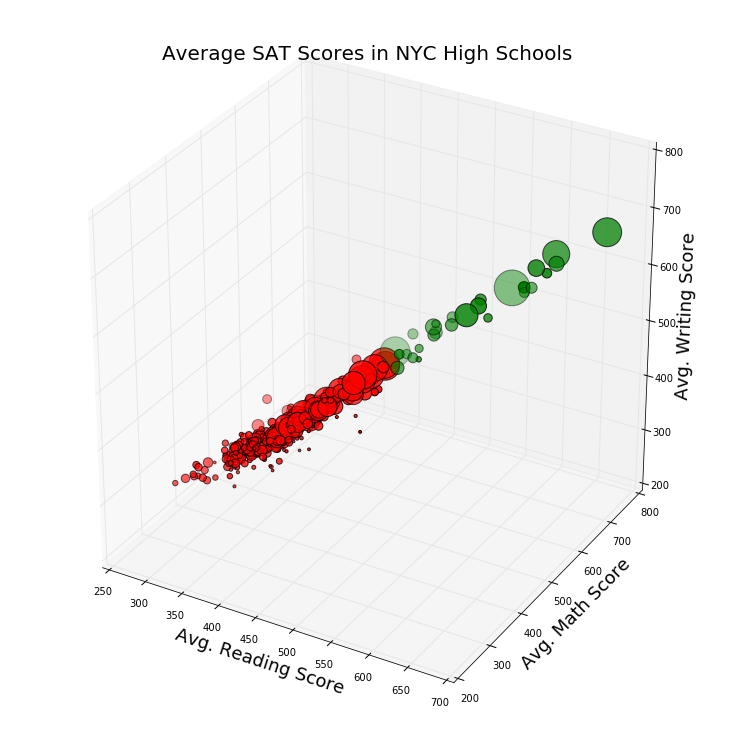

In [260]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(Reading_a, Math_a, Writing_a, s = Size_a, c = 'g')
ax.scatter(Reading_b, Math_b, Writing_b, s = Size_b, c = 'r')
ax.set_title("Average SAT Scores in NYC High Schools", fontsize = 20)
ax.set_xlabel("Avg. Reading Score", fontsize = 18)
ax.set_ylabel("Avg. Math Score", fontsize = 18)
ax.set_zlabel("Avg. Writing Score", fontsize = 18)
plt.show()